<a href="https://colab.research.google.com/github/DilshanBotheju/CSACP_Project/blob/main/CrimeType_and_Time_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

Crime Dataset

In [ ]:
#Load relevant datasets
crime_data_path = "/content/drive/MyDrive/DSGP/Baltimore_Part1_Crime_data.csv"
crime_data = pd.read_csv(crime_data_path, encoding = "latin-1")
crime_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.442562e+06,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,NaN,NaN,232,SOUTHEAST,BAYVIEW,39.2878,-76.5399,"(39.2878,-76.5399)",NaN,NaN,1,NaN
1,1.425428e+06,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,NaN,NaN,312,EASTERN,EAST BALTIMORE MIDWAY,39.3120,-76.6003,"(39.312,-76.6003)",NaN,Eastern 1,1,NaN
2,1.417097e+06,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,NaN,NaN,932,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2821,-76.6299,"(39.2821,-76.6299)",NaN,NaN,1,NaN
3,1.431878e+06,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,NaN,NaN,214,SOUTHEAST,CANTON,39.2789,-76.5777,"(39.2789,-76.5777)",NaN,NaN,1,NaN
4,1.433804e+06,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,NaN,HANDGUN,222,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.2948,-76.5708,"(39.2948,-76.5708)",NaN,NaN,1,NaN


In [ ]:
# Identifying shape of the original dataset
crime_data.shape

(516635, 19)

In [ ]:
# Getting a sample percentage of data to preprocess
sample_percentage = 1
crime_data = crime_data.sample(frac=sample_percentage, random_state=42)

In [ ]:
# Identifying shape of sample dataset
crime_data.shape

(516635, 19)

In [ ]:
# Analyisng crime dataset
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516635 entries, 68726 to 121958
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             515747 non-null  float64
 1   Y                515747 non-null  float64
 2   RowID            516635 non-null  int64  
 3   CrimeDateTime    516635 non-null  object 
 4   CrimeCode        516635 non-null  object 
 5   Location         514081 non-null  object 
 6   Description      516635 non-null  object 
 7   Inside_Outside   442718 non-null  object 
 8   Weapon           107334 non-null  object 
 9   Post             514896 non-null  object 
 10  District         514896 non-null  object 
 11  Neighborhood     514865 non-null  object 
 12  Latitude         515747 non-null  float64
 13  Longitude        515747 non-null  float64
 14  GeoLocation      516635 non-null  object 
 15  Premise          442382 non-null  object 
 16  VRIName          60400 non-null   objec

In [ ]:
crime_codes_path = "/content/drive/MyDrive/DSGP/BALTIMORE_CRIME_CODES.csv"
crime_codes = pd.read_csv(crime_codes_path, encoding = "latin-1")
crime_codes.head()

,CODE,TYPE,NAME,CLASS,NAME_COMBINE,WEAPON,VIOLENT_CR,VIO_PROP_CFS
0,13,CTYP,ASSIST OFFICER,CFS,ASSIST OFFICER,NaN,NaN,OTHER
1,1A,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT
2,1F,CTYP,MURDER,PART 1,HOMICIDE,FIREARM,HOMICIDE,VIOLENT
3,1K,CTYP,MURDER,PART 1,HOMICIDE,KNIFE,HOMICIDE,VIOLENT
4,1O,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT


In [ ]:
crime_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CODE          203 non-null    object
 1   TYPE          203 non-null    object
 2   NAME          202 non-null    object
 3   CLASS         202 non-null    object
 4   NAME_COMBINE  202 non-null    object
 5   WEAPON        45 non-null     object
 6   VIOLENT_CR    103 non-null    object
 7   VIO_PROP_CFS  203 non-null    object
dtypes: object(8)
memory usage: 12.8+ KB


In [ ]:
# Drop unnecessary columns from crime codes dataset
crime_codes = crime_codes.drop(["TYPE","CLASS","WEAPON","NAME_COMBINE","VIOLENT_CR","VIO_PROP_CFS"],axis=1,errors="ignore")
crime_codes.head(20)

,CODE,NAME
0,13,ASSIST OFFICER
1,1A,MURDER
2,1F,MURDER
3,1K,MURDER
4,1O,MURDER
5,20A,FOLLOWUP
6,20B,FOOT PATROL
7,20C,BANK CHECK
8,20D,DETAIL
9,20E,COURT


In [ ]:
#Renaming column names
crime_codes = crime_codes.rename(columns={"CODE": "CrimeCode", "NAME": "CrimeName"})

# Merge the datasets to map codes to names
crime_merged_data = pd.merge(crime_data, crime_codes[["CrimeCode", "CrimeName"]], on="CrimeCode", how="left")
crime_merged_data.head(10)

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName
0,1.402371e+06,598536.523340,68727,2020/05/09 20:00:00+00,6D,3700 CHESHOLM RD,LARCENY FROM AUTO,O,NaN,812,SOUTHWEST,FAIRMONT,39.3097,-76.6818,"(39.3097,-76.6818)",STREET,NaN,1,NaN,LARCENY- FROM AUTO
1,1.413668e+06,596830.031062,285686,2015/11/01 02:00:00+00,7A,1300 N STRICKER ST,AUTO THEFT,O,NaN,724,WESTERN,SANDTOWN-WINCHESTER,39.3049,-76.6419,"(39.3049,-76.6419)",STREET,NaN,1,NaN,STOLEN AUTO
2,1.399888e+06,588220.126897,465873,2012/01/15 16:30:00+00,4C,4500 FREDERICK AVE,AGG. ASSAULT,O,OTHER,822,SOUTHWEST,IRVINGTON,39.2814,-76.6907,"(39.2814,-76.6907)",STREET,NaN,1,NaN,AGG. ASSLT.- OTH.
3,1.409558e+06,590950.039225,163100,2018/04/27 12:00:00+00,5A,0 N CATHERINE ST,BURGLARY,I,NaN,835,SOUTHWEST,SHIPLEY HILL,39.2888,-76.6565,"(39.2888,-76.6565)",ROW/TOWNHOUSE-OCC,NaN,1,NaN,BURG. RES. (FORCE)
4,1.428857e+06,591940.456169,197693,2017/08/09 14:00:00+00,6J,0 S CASTLE ST,LARCENY,NaN,NaN,212,SOUTHEAST,BUTCHER'S HILL,39.2913,-76.5883,"(39.2913,-76.5883)",NaN,NaN,1,NaN,LARCENY- OTHER
5,1.400349e+06,594122.295203,493126,2011/07/02 04:00:00+00,6J,1000 KEVIN RD,LARCENY,O,NaN,822,SOUTHWEST,ROGNEL HEIGHTS,39.2976,-76.6890,"(39.2976,-76.689)",PORCH/DECK,NaN,1,NaN,LARCENY- OTHER
6,1.429773e+06,614673.177011,304753,2015/06/22 00:00:00+00,6D,1600 BURNWOOD RD,LARCENY FROM AUTO,O,NaN,415,NORTHEAST,PERRING LOCH,39.3537,-76.5847,"(39.3537,-76.5847)",STREET,NaN,1,NaN,LARCENY- FROM AUTO
7,1.430571e+06,594716.443204,364828,2014/02/27 02:20:00+00,4E,2500 E MONUMENT ST,COMMON ASSAULT,O,NaN,333,EASTERN,MILTON-MONTFORD,39.2989,-76.5822,"(39.2989,-76.5822)",STREET,Eastern 2,1,NaN,COMMON ASSAULT
8,1.421926e+06,591290.924311,513862,2011/01/24 15:32:00+00,3M,100 E BALTIMORE ST,ROBBERY - COMMERCIAL,I,NaN,111,CENTRAL,DOWNTOWN,39.2896,-76.6128,"(39.2896,-76.6128)",BANK/FINANCIAL INST,NaN,1,NaN,ROBB BANK (UA)
9,1.421236e+06,600393.939155,268764,2016/03/24 17:28:00+00,4B,2200 SAINT PAUL ST,AGG. ASSAULT,I,KNIFE,514,NORTHERN,BARCLAY,39.3146,-76.6151,"(39.3146,-76.6151)",APT/CONDO - OCCUPIED,NaN,1,NaN,AGG. ASSLT.- CUT


In [ ]:
#Ansalyse merged dataset
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             515747 non-null  float64
 1   Y                515747 non-null  float64
 2   RowID            516635 non-null  int64  
 3   CrimeDateTime    516635 non-null  object 
 4   CrimeCode        516635 non-null  object 
 5   Location         514081 non-null  object 
 6   Description      516635 non-null  object 
 7   Inside_Outside   442718 non-null  object 
 8   Weapon           107334 non-null  object 
 9   Post             514896 non-null  object 
 10  District         514896 non-null  object 
 11  Neighborhood     514865 non-null  object 
 12  Latitude         515747 non-null  float64
 13  Longitude        515747 non-null  float64
 14  GeoLocation      516635 non-null  object 
 15  Premise          442382 non-null  object 
 16  VRIName          60400 non-null   obje

In [ ]:
#Identifying null value count
crime_merged_data.isnull().sum()

,0
ï»¿X,888
Y,888
RowID,0
CrimeDateTime,0
CrimeCode,0
Location,2554
Description,0
Inside_Outside,73917
Weapon,409301
Post,1739


In [ ]:
# Replace NaN as Unknown
crime_merged_data.replace(np.nan, "Unknown", inplace=True)

In [ ]:
#Seperating time and date into two columns
crime_merged_data['CrimeDate'] = pd.to_datetime(crime_merged_data["CrimeDateTime"], errors="coerce").dt.date
crime_merged_data['CrimeTime'] = pd.to_datetime(crime_merged_data["CrimeDateTime"], errors="coerce").dt.time

crime_merged_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,...,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName,CrimeDate,CrimeTime
0,1402370.886815,598536.52334,68727,2020/05/09 20:00:00+00,6D,3700 CHESHOLM RD,LARCENY FROM AUTO,O,Unknown,812,...,39.3097,-76.6818,"(39.3097,-76.6818)",STREET,Unknown,1,Unknown,LARCENY- FROM AUTO,2020-05-09,20:00:00
1,1413667.672417,596830.031062,285686,2015/11/01 02:00:00+00,7A,1300 N STRICKER ST,AUTO THEFT,O,Unknown,724,...,39.3049,-76.6419,"(39.3049,-76.6419)",STREET,Unknown,1,Unknown,STOLEN AUTO,2015-11-01,02:00:00
2,1399887.503931,588220.126897,465873,2012/01/15 16:30:00+00,4C,4500 FREDERICK AVE,AGG. ASSAULT,O,OTHER,822,...,39.2814,-76.6907,"(39.2814,-76.6907)",STREET,Unknown,1,Unknown,AGG. ASSLT.- OTH.,2012-01-15,16:30:00
3,1409558.308972,590950.039225,163100,2018/04/27 12:00:00+00,5A,0 N CATHERINE ST,BURGLARY,I,Unknown,835,...,39.2888,-76.6565,"(39.2888,-76.6565)",ROW/TOWNHOUSE-OCC,Unknown,1,Unknown,BURG. RES. (FORCE),2018-04-27,12:00:00
4,1428857.426745,591940.456169,197693,2017/08/09 14:00:00+00,6J,0 S CASTLE ST,LARCENY,Unknown,Unknown,212,...,39.2913,-76.5883,"(39.2913,-76.5883)",Unknown,Unknown,1,Unknown,LARCENY- OTHER,2017-08-09,14:00:00


In [ ]:
#Identifying null count for each column
crime_merged_data.isnull().sum()

,0
ï»¿X,0
Y,0
RowID,0
CrimeDateTime,0
CrimeCode,0
Location,0
Description,0
Inside_Outside,0
Weapon,0
Post,0


In [ ]:
# Find duplicate rows
duplicate_rows = crime_merged_data[crime_merged_data.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Count the number of duplicate rows
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")


Duplicate rows:
Empty DataFrame
Columns: [ï»¿X, Y, RowID, CrimeDateTime, CrimeCode, Location, Description, Inside_Outside, Weapon, Post, District, Neighborhood, Latitude, Longitude, GeoLocation, Premise, VRIName, Total_Incidents, Shape, CrimeName, CrimeDate, CrimeTime]
Index: []

[0 rows x 22 columns]

Number of duplicate rows: 0


In [ ]:
# Categories for premises
crime_merged_data["Premise"].value_counts()

,count
Premise,
STREET,160900
ROW/TOWNHOUSE-OCC,97879
Unknown,74253
APT/CONDO - OCCUPIED,21148
OTHER - INSIDE,17495
...,...
MARKET STALLS,1
FIRE DEPARTMENT,1
BAKERY,1


In [ ]:
# Summarizing Crime Time to lie between an hour
crime_merged_data["CrimeTime"].value_counts()

,count
CrimeTime,
18:00:00,11793
17:00:00,11554
12:00:00,10644
16:00:00,10623
20:00:00,10424
...,...
08:35:28,1
15:00:34,1
02:55:18,1


In [ ]:
from datetime import datetime, timedelta

# Function to convert time to a 1-hour range
def time_to_range(time_obj):
    try:
        # Convert the time object to a string
        time_str = str(time_obj)

        # Parse the string to a datetime object
        time = datetime.strptime(time_str, "%H:%M:%S")

        # Get the start and end times of the range
        start_time = time.replace(minute=0, second=0)
        end_time = start_time + timedelta(hours=2)
        return f"{start_time.time()} - {end_time.time()}"
    except ValueError:
        return time_str

# Apply the function
crime_merged_data["Time_Range"] = crime_merged_data["CrimeTime"].astype(str).apply(time_to_range)


In [ ]:
# Applying function to time range
crime_merged_data["Time_Range"].value_counts()

,count
Time_Range,
18:00:00 - 20:00:00,30434
17:00:00 - 19:00:00,29641
20:00:00 - 22:00:00,28389
15:00:00 - 17:00:00,28308
16:00:00 - 18:00:00,28264
21:00:00 - 23:00:00,28205
19:00:00 - 21:00:00,28105
22:00:00 - 00:00:00,26953
00:00:00 - 02:00:00,26267


In [ ]:
crime_merged_data["Time_Range"] = crime_merged_data["Time_Range"].astype(str)
crime_merged_data["Time_Range"].value_counts()


,count
Time_Range,
18:00:00 - 20:00:00,30434
17:00:00 - 19:00:00,29641
20:00:00 - 22:00:00,28389
15:00:00 - 17:00:00,28308
16:00:00 - 18:00:00,28264
21:00:00 - 23:00:00,28205
19:00:00 - 21:00:00,28105
22:00:00 - 00:00:00,26953
00:00:00 - 02:00:00,26267


In [ ]:
# Function to classify time ranges
def set_time_range(time_range):
    if time_range == "Unknown":
        return "Unknown"

    # Extract start time from the range
    start_time_str = time_range.split(" - ")[0]

    # Convert to datetime time object
    try:
        start_time = pd.to_datetime(start_time_str, format='%H:%M:%S').time()
    except ValueError:
        return "Unknown"

    # Classify time into categories
    if start_time >= pd.to_datetime("06:00:00").time() and start_time < pd.to_datetime("12:00:00").time():
        return "Morning"
    elif start_time >= pd.to_datetime("12:00:00").time() and start_time < pd.to_datetime("18:00:00").time():
        return "Afternoon"
    elif start_time >= pd.to_datetime("18:00:00").time() and start_time < pd.to_datetime("21:00:00").time():
        return "Evening"
    elif start_time >= pd.to_datetime("21:00:00").time() and start_time <= pd.to_datetime("23:59:59").time():
        return "Night"
    elif start_time >= pd.to_datetime("00:00:00").time() and start_time < pd.to_datetime("06:00:00").time():
        return "Late Night"

    return "Unknown"

# Apply function to classify time categories
crime_merged_data["Time_Category"] = crime_merged_data["Time_Range"].apply(set_time_range)

In [ ]:
# Displat time categories
crime_merged_data["Time_Category"].value_counts()

,count
Time_Category,
Afternoon,158794
Morning,99284
Late Night,91036
Evening,86928
Night,80591
Unknown,2


In [ ]:
def get_season(date_str):
    try:
        date = pd.to_datetime(date_str, errors="coerce")

        month = date.month
        if month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        elif month in [9, 10, 11]:
            return "Autumn"
        else:
            return "Winter"
    except Exception as e:
        return "Unknown"

# Apply function to dataset
crime_merged_data["Season"] = crime_merged_data["CrimeDate"].apply(get_season)

In [ ]:
# Renaming Inside_Outside column
crime_merged_data = crime_merged_data.rename(columns={"Inside_Outside": "Inside/Outside"})
crime_merged_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,...,Premise,VRIName,Total_Incidents,Shape,CrimeName,CrimeDate,CrimeTime,Time_Range,Time_Category,Season
0,1402370.886815,598536.52334,68727,2020/05/09 20:00:00+00,6D,3700 CHESHOLM RD,LARCENY FROM AUTO,O,Unknown,812,...,STREET,Unknown,1,Unknown,LARCENY- FROM AUTO,2020-05-09,20:00:00,20:00:00 - 22:00:00,Evening,Spring
1,1413667.672417,596830.031062,285686,2015/11/01 02:00:00+00,7A,1300 N STRICKER ST,AUTO THEFT,O,Unknown,724,...,STREET,Unknown,1,Unknown,STOLEN AUTO,2015-11-01,02:00:00,02:00:00 - 04:00:00,Late Night,Autumn
2,1399887.503931,588220.126897,465873,2012/01/15 16:30:00+00,4C,4500 FREDERICK AVE,AGG. ASSAULT,O,OTHER,822,...,STREET,Unknown,1,Unknown,AGG. ASSLT.- OTH.,2012-01-15,16:30:00,16:00:00 - 18:00:00,Afternoon,Winter
3,1409558.308972,590950.039225,163100,2018/04/27 12:00:00+00,5A,0 N CATHERINE ST,BURGLARY,I,Unknown,835,...,ROW/TOWNHOUSE-OCC,Unknown,1,Unknown,BURG. RES. (FORCE),2018-04-27,12:00:00,12:00:00 - 14:00:00,Afternoon,Spring
4,1428857.426745,591940.456169,197693,2017/08/09 14:00:00+00,6J,0 S CASTLE ST,LARCENY,Unknown,Unknown,212,...,Unknown,Unknown,1,Unknown,LARCENY- OTHER,2017-08-09,14:00:00,14:00:00 - 16:00:00,Afternoon,Summer


In [ ]:
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ï»¿X             516635 non-null  object
 1   Y                516635 non-null  object
 2   RowID            516635 non-null  int64 
 3   CrimeDateTime    516635 non-null  object
 4   CrimeCode        516635 non-null  object
 5   Location         516635 non-null  object
 6   Description      516635 non-null  object
 7   Inside/Outside   516635 non-null  object
 8   Weapon           516635 non-null  object
 9   Post             516635 non-null  object
 10  District         516635 non-null  object
 11  Neighborhood     516635 non-null  object
 12  Latitude         516635 non-null  object
 13  Longitude        516635 non-null  object
 14  GeoLocation      516635 non-null  object
 15  Premise          516635 non-null  object
 16  VRIName          516635 non-null  object
 17  Total_Inci

In [ ]:
# Dropping unnecessary columns
crime_merged_data = crime_merged_data.drop(["ï»¿X","CrimeCode","Y","RowID","CrimeTime","CrimeDate","Total_Incidents","Weapon","Post","Location","CrimeDateTime","Latitude","Longitude","GeoLocation","VRIName","Shape"],axis=1,errors="ignore")
crime_merged_data.head(10)

,Description,Inside/Outside,District,Neighborhood,Premise,CrimeName,Time_Range,Time_Category,Season
0,LARCENY FROM AUTO,O,SOUTHWEST,FAIRMONT,STREET,LARCENY- FROM AUTO,20:00:00 - 22:00:00,Evening,Spring
1,AUTO THEFT,O,WESTERN,SANDTOWN-WINCHESTER,STREET,STOLEN AUTO,02:00:00 - 04:00:00,Late Night,Autumn
2,AGG. ASSAULT,O,SOUTHWEST,IRVINGTON,STREET,AGG. ASSLT.- OTH.,16:00:00 - 18:00:00,Afternoon,Winter
3,BURGLARY,I,SOUTHWEST,SHIPLEY HILL,ROW/TOWNHOUSE-OCC,BURG. RES. (FORCE),12:00:00 - 14:00:00,Afternoon,Spring
4,LARCENY,Unknown,SOUTHEAST,BUTCHER'S HILL,Unknown,LARCENY- OTHER,14:00:00 - 16:00:00,Afternoon,Summer
5,LARCENY,O,SOUTHWEST,ROGNEL HEIGHTS,PORCH/DECK,LARCENY- OTHER,04:00:00 - 06:00:00,Late Night,Summer
6,LARCENY FROM AUTO,O,NORTHEAST,PERRING LOCH,STREET,LARCENY- FROM AUTO,00:00:00 - 02:00:00,Late Night,Summer
7,COMMON ASSAULT,O,EASTERN,MILTON-MONTFORD,STREET,COMMON ASSAULT,02:00:00 - 04:00:00,Late Night,Winter
8,ROBBERY - COMMERCIAL,I,CENTRAL,DOWNTOWN,BANK/FINANCIAL INST,ROBB BANK (UA),15:00:00 - 17:00:00,Afternoon,Winter
9,AGG. ASSAULT,I,NORTHERN,BARCLAY,APT/CONDO - OCCUPIED,AGG. ASSLT.- CUT,17:00:00 - 19:00:00,Afternoon,Spring


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns
categorical_cols = ["Inside/Outside","District","CrimeName","Premise","Time_Range","Season","Neighborhood","Time_Category"]

# Apply label encoding to each column
for col in categorical_cols:
    crime_merged_data[col] = label_encoder.fit_transform(crime_merged_data[col])

crime_merged_data.head()

,Description,Inside/Outside,District,Neighborhood,Premise,CrimeName,Time_Range,Time_Category,Season
0,LARCENY FROM AUTO,2,7,80,142,27,20,1,1
1,AUTO THEFT,2,9,229,142,78,2,2,0
2,AGG. ASSAULT,2,7,124,142,3,16,0,3
3,BURGLARY,0,7,233,124,21,12,0,1
4,LARCENY,4,5,28,154,31,14,0,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit-transform description and neighborhood
desc_vectors = tfidf.fit_transform(crime_merged_data["Description"].astype(str))

# Convert to DataFrame
desc_df = pd.DataFrame(desc_vectors.toarray(), columns=tfidf.get_feature_names_out())


# Merge with the main dataset
crime_merged_data = pd.concat([crime_merged_data, desc_df], axis=1)

In [ ]:
crime_merged_data = crime_merged_data.drop(["Description"],axis=1,errors="ignore")
crime_merged_data.head()

,Inside/Outside,District,Neighborhood,Premise,CrimeName,Time_Range,Time_Category,Season,agg,arson,...,commercial,common,homicide,larceny,rape,residence,robbery,shooting,street,theft
0,2,7,80,142,27,20,1,1,0.000000,0.0,...,0.0,0.0,0.0,0.627994,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,9,229,142,78,2,2,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.808777
2,2,7,124,142,3,16,0,3,0.818981,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0,7,233,124,21,12,0,1,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,4,5,28,154,31,14,0,2,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Inside/Outside  516635 non-null  int64  
 1   District        516635 non-null  int64  
 2   Neighborhood    516635 non-null  int64  
 3   Premise         516635 non-null  int64  
 4   CrimeName       516635 non-null  int64  
 5   Time_Range      516635 non-null  int64  
 6   Time_Category   516635 non-null  int64  
 7   Season          516635 non-null  int64  
 8   agg             516635 non-null  float64
 9   arson           516635 non-null  float64
 10  assault         516635 non-null  float64
 11  auto            516635 non-null  float64
 12  burglary        516635 non-null  float64
 13  carjacking      516635 non-null  float64
 14  commercial      516635 non-null  float64
 15  common          516635 non-null  float64
 16  homicide        516635 non-null  float64
 17  larceny   

Feature Engineering

Training set size: (413308, 22)
Test set size: (103327, 22)


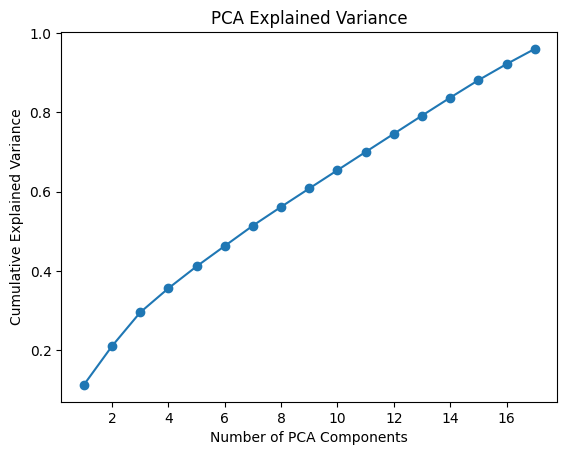

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Assuming crime_merged_data is already loaded
crime_merged_data_sample = crime_merged_data.sample(frac=1, random_state=42)

# Define features and multi-output targets
X = crime_merged_data_sample.drop(columns=["CrimeName", "Time_Range"])
y = crime_merged_data_sample[["CrimeName", "Time_Range"]]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 95% variance retention
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot PCA explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


Model Development

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Initialize base XGBoost classifier
xgb_base = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)


multi_output_xgb = MultiOutputClassifier(xgb_base)

# Train the model
multi_output_xgb.fit(X_train_pca, y_train)

# Predict on test data
y_pred = multi_output_xgb.predict(X_test_pca)

# Evaluate the model
accuracy_crime = accuracy_score(y_test["CrimeName"], y_pred[:, 0])
accuracy_time = accuracy_score(y_test["Time_Range"], y_pred[:, 1])

print(f"CrimeName Prediction Accuracy: {accuracy_crime:.4f}")
print(f"TimeRange Prediction Accuracy: {accuracy_time:.4f}")

print("\nClassification Report for CrimeName:")
print(classification_report(y_test["CrimeName"], y_pred[:, 0]))

print("\nClassification Report for TimeRange:")
print(classification_report(y_test["Time_Range"], y_pred[:, 1]))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:04:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CrimeName Prediction Accuracy: 0.7346
TimeRange Prediction Accuracy: 0.2724

Classification Report for CrimeName:
              precision    recall  f1-score   support

           0       0.33      0.12      0.18      2991
           1       0.38      0.27      0.31      2659
           2       0.17      0.00      0.00      1460
           3       0.41      0.79      0.54      4589
           4       0.00      0.00      0.00         1
           5       0.73      0.50      0.59        16
           6       0.00      0.00      0.00         2
           7       0.37      0.30      0.33        23
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         2
          11       0.39      0.21      0.27        33
          12       0.00      0.00      0.00         3
          13       0.42      0.53      0.47        89
          14       0.50      0.19      0.27        16
          15       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.29      0.77      0.42      5155
           1       0.26      0.23      0.24      4159
           2       0.25      0.06      0.10      3227
           3       0.24      0.02      0.04      2303
           4       0.25      0.02      0.03      1807
           5       0.09      0.00      0.01      1547
           6       0.17      0.01      0.03      1812
           7       0.19      0.08      0.11      2677
           8       0.20      0.25      0.22      3594
           9       0.19      0.13      0.15      3645
          10       0.22      0.17      0.19      3989
          11       0.24      0.51      0.33      3943
          12       0.20      0.28      0.24      5134
          13       0.20      0.02      0.04      4647
          14       0.19      0.04      0.06      4686
          15       0.20      0.26      0.23      5623
          16       0.19      0.16      0.17      5703
          17       0.22    